NAMA : DANIEL ADITYA WARIH

LINK DATASETS : https://www.kaggle.com/andrewmvd/animal-faces


In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
 ! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"danielladitya","key":"a77b96dc0265ed13a8c83fe8645d5b31"}'}

In [ ]:
 ! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d andrewmvd/animal-faces

 99% 689M/696M [00:13<00:00, 41.9MB/s]
100% 696M/696M [00:14<00:00, 52.0MB/s]


In [ ]:
! mkdir animal-faces

In [ ]:
! unzip animal-faces.zip -d animal-faces

Streaming output truncated to the last 5000 lines.
  inflating: animal-faces/afhq/train/wild/flickr_wild_001378.jpg  
  inflating: animal-faces/afhq/train/wild/flickr_wild_001379.jpg  
  inflating: animal-faces/afhq/train/wild/flickr_wild_001380.jpg  
  inflating: animal-faces/afhq/train/wild/flickr_wild_001381.jpg  
  inflating: animal-faces/afhq/train/wild/flickr_wild_001382.jpg  
  inflating: animal-faces/afhq/train/wild/flickr_wild_001384.jpg  
  inflating: animal-faces/afhq/train/wild/flickr_wild_001385.jpg  
  inflating: animal-faces/afhq/train/wild/flickr_wild_001386.jpg  
  inflating: animal-faces/afhq/train/wild/flickr_wild_001387.jpg  
  inflating: animal-faces/afhq/train/wild/flickr_wild_001388.jpg  
  inflating: animal-faces/afhq/train/wild/flickr_wild_001389.jpg  
  inflating: animal-faces/afhq/train/wild/flickr_wild_001390.jpg  
  inflating: animal-faces/afhq/train/wild/flickr_wild_001391.jpg  
  inflating: animal-faces/afhq/train/wild/flickr_wild_001392.jpg  
  inflating

In [ ]:
import os
base_dir = '/content/animal-faces'
train_dir = os.path.join(base_dir, 'afhq/train')
val_dir = os.path.join(base_dir, 'afhq/train')

In [ ]:
os.listdir('/content/animal-faces/afhq/train')
os.listdir('/content/animal-faces/afhq/train')

['dog', 'wild', 'cat']

In [ ]:
#mengatur path folder untuk setiap classes, terdapat 3 classes
train_cat = os.path.join(train_dir, 'cat')
train_dog = os.path.join(train_dir, 'dog')
train_wild = os.path.join(train_dir, 'wild')

val_cat = os.path.join(val_dir, 'cat')
val_dog = os.path.join(val_dir, 'dog')
val_wild = os.path.join(val_dir, 'wild')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#mengatur Image Data Generator
train_data = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='nearest',
    validation_split=0.2 #membagi agar train set 80% dan validation set 20%
)

test_data = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='nearest',
    validation_split=0.2 #membagi agar train set 80% dan validation set 20%
)

In [ ]:
#membuat train dan val generator
train_gen = train_data.flow_from_directory(
        train_dir,  
        target_size=(150, 150), 
        batch_size=100, 
        subset='training',
        class_mode='categorical')
 
val_gen = test_data.flow_from_directory(
        val_dir, 
        target_size=(150, 150), 
        batch_size=100, 
        subset='validation',
        class_mode='categorical')

Found 11706 images belonging to 3 classes.
Found 2924 images belonging to 3 classes.


In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  #menggunakan softmax karena classes adalah multiclass
])

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model.summary() #menampilkan summary model
model.compile(loss='categorical_crossentropy', #menggunakan categorical_crossentropy dikarenakan 3 classes
              optimizer=tf.optimizers.Adam(), 
              metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [ ]:
#membuat callbacks
class cb(tf.keras.callbacks.Callback): 
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.97 and logs.get('val_accuracy') > 0.97):
      print("\nAkurasi telah mencapai di atas 97%, training berhenti")
      self.model.stop_training = True #training akan berhenti ketika accuracy dan val_accuracy telah mencapai >= 97%

callbacks = cb()

In [ ]:
history = model.fit(
      train_gen,
      steps_per_epoch=118,
      epochs=20, 
      validation_data=val_gen, 
      validation_steps=29,
      verbose=1,
      callbacks=[callbacks]
      )

Epoch 1/20
118/118 [==============================] - 165s 1s/step - loss: 0.6922 - accuracy: 0.6832 - val_loss: 0.3534 - val_accuracy: 0.8676
Epoch 2/20
118/118 [==============================] - 137s 1s/step - loss: 0.2720 - accuracy: 0.8939 - val_loss: 0.2398 - val_accuracy: 0.9097
Epoch 3/20
118/118 [==============================] - 139s 1s/step - loss: 0.1915 - accuracy: 0.9304 - val_loss: 0.1722 - val_accuracy: 0.9369
Epoch 4/20
118/118 [==============================] - 135s 1s/step - loss: 0.1564 - accuracy: 0.9411 - val_loss: 0.1309 - val_accuracy: 0.9510
Epoch 5/20
118/118 [==============================] - 137s 1s/step - loss: 0.1261 - accuracy: 0.9546 - val_loss: 0.1341 - val_accuracy: 0.9514
Epoch 6/20
118/118 [==============================] - 135s 1s/step - loss: 0.1172 - accuracy: 0.9578 - val_loss: 0.1486 - val_accuracy: 0.9414
Epoch 7/20
118/118 [==============================] - 127s 1s/step - loss: 0.1044 - accuracy: 0.9608 - val_loss: 0.1106 - val_accuracy: 0.9628

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


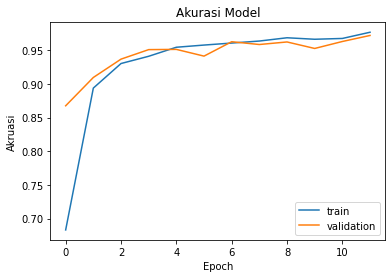

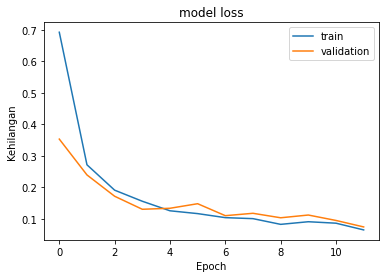

In [ ]:
import matplotlib.pyplot as plt
#menampilkan grafik menggunakan plot
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('Akruasi')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Kehilangan')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

Saving Anjing-Siberian-Husky.jpg to Anjing-Siberian-Husky.jpg
Anjing-Siberian-Husky.jpg
ini adalah binatang anjing


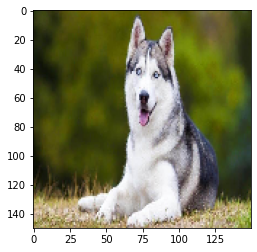

In [ ]:
import numpy as np
from keras.preprocessing import image
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0) 

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('Ini adalah binatang kucing')
  elif classes[0,1]!=0:
    print('ini adalah binatang anjing')
  else:
    print('ini adalah binatang liar')

Saving flickr_dog_000011.jpg to flickr_dog_000011 (1).jpg
flickr_dog_000011.jpg
ini adalah binatang anjing


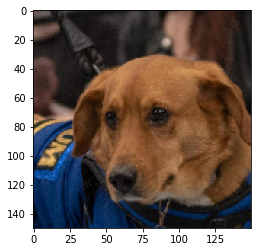

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0) 

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('Ini adalah binatang kucing')
  elif classes[0,1]!=0:
    print('ini adalah binatang anjing')
  else:
    print('ini adalah binatang liar')

Saving flickr_wild_000019.jpg to flickr_wild_000019 (1).jpg
flickr_wild_000019.jpg
ini adalah binatang liar


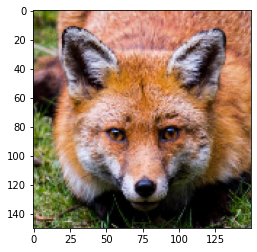

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0) 

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('Ini adalah binatang kucing')
  elif classes[0,1]!=0:
    print('ini adalah binatang anjing')
  else:
    print('ini adalah binatang liar')

Saving flickr_wild_000032.jpg to flickr_wild_000032.jpg
flickr_wild_000032.jpg
ini adalah binatang liar


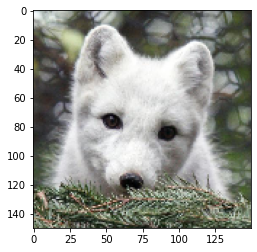

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0) 

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('Ini adalah binatang kucing')
  elif classes[0,1]!=0:
    print('ini adalah binatang anjing')
  else:
    print('ini adalah binatang liar')

In [ ]:
# Convert Model Ke TFlite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model TFlite
with open('Submission_model_image_classification.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpnujj7th7/assets


INFO:tensorflow:Assets written to: /tmp/tmpnujj7th7/assets
